In [2]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt

vd= pd.read_csv("videogame.csv")
print (vd)

                                Name Platform  Year_of_Release         Genre  \
0                         Wii Sports      Wii           2006.0        Sports   
1                  Super Mario Bros.      NES           1985.0      Platform   
2                     Mario Kart Wii      Wii           2008.0        Racing   
3                  Wii Sports Resort      Wii           2009.0        Sports   
4           Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
...                              ...      ...              ...           ...   
16714  Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16715               LMA Manager 2007     X360           2006.0        Sports   
16716        Haitaka no Psychedelica      PSV           2016.0     Adventure   
16717               Spirits & Spells      GBA           2003.0      Platform   
16718            Winning Post 8 2016      PSV           2016.0    Simulation   

          Publisher  NA_Sales  EU_Sales

ANALISIS EXPLORATORIO

In [3]:
vd.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [4]:
column= vd.columns
print (column)

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')


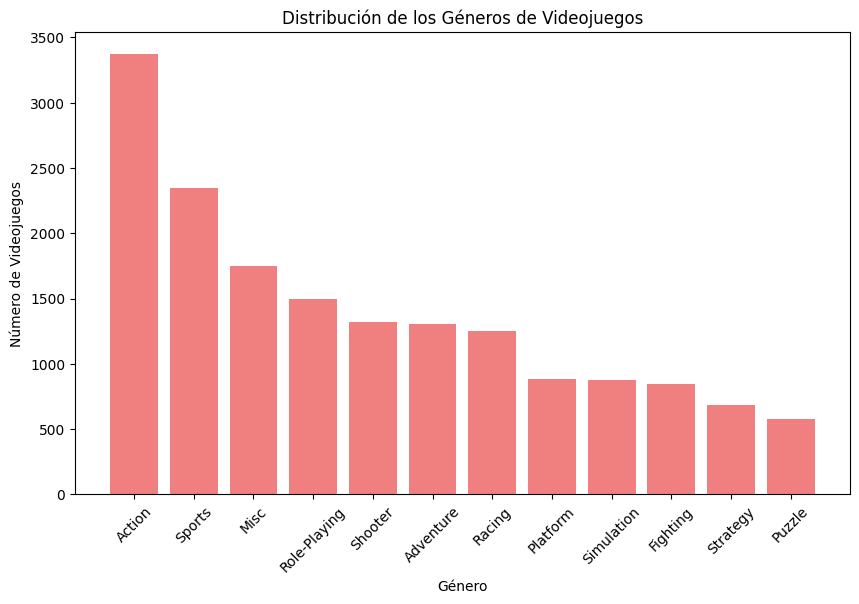

In [5]:
genre_counts = vd['Genre'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(genre_counts.index, genre_counts.values, color='lightcoral')
plt.title('Distribución de los Géneros de Videojuegos')
plt.xlabel('Género')
plt.ylabel('Número de Videojuegos')
plt.xticks(rotation=45)
plt.show()

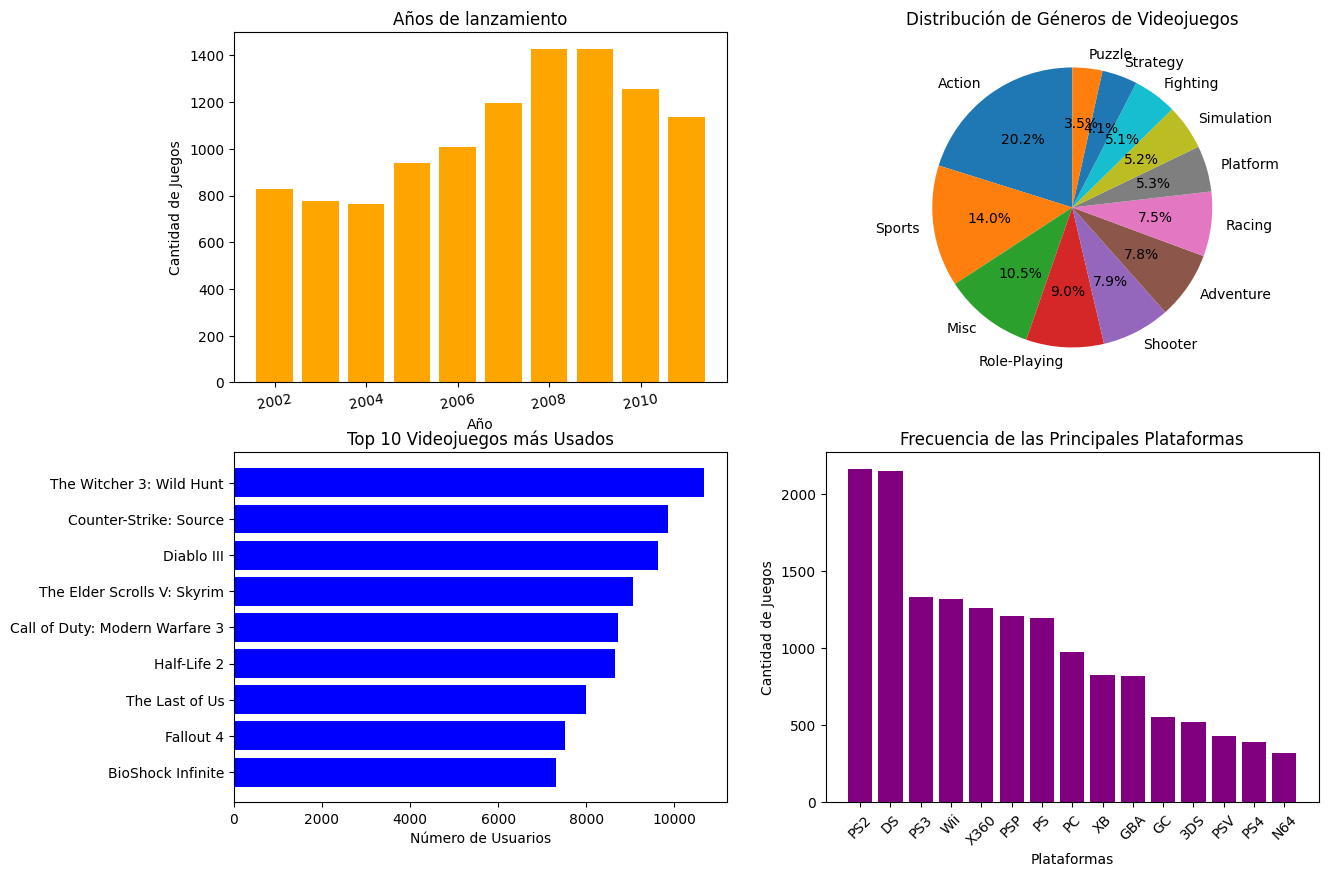

In [6]:
ig, axs = plt.subplots(2, 2, figsize=(14, 10))

#grafica i
platform_counts = vd['Year_of_Release'].value_counts().head(10)
axs[0, 0].bar(platform_counts.index, platform_counts.values, color='orange')
axs[0, 0].set_title("Años de lanzamiento")
axs[0, 0].set_xlabel('Año')
axs[0, 0].set_ylabel('Cantidad de Juegos')
axs[0, 0].tick_params(axis='x', rotation=10)

#grafica ii
genre_counts = vd['Genre'].value_counts()
axs[0, 1].pie(genre_counts.values, labels=genre_counts.index, autopct='%1.1f%%', startangle=90)
axs[0, 1].set_title('Distribución de Géneros de Videojuegos')

#grafica iii
top_used_games = vd[['Name', 'User_Count']].dropna().sort_values(by='User_Count', ascending=False).head(10)
axs[1, 0].barh(top_used_games['Name'], top_used_games['User_Count'], color='blue')
axs[1, 0].set_title('Top 10 Videojuegos más Usados')
axs[1, 0].set_xlabel('Número de Usuarios')
axs[1, 0].invert_yaxis()

#grafica iv
platform_counts = vd['Platform'].value_counts().head(15)
axs[1, 1].bar(platform_counts.index, platform_counts.values, color='purple')
axs[1, 1].set_title('Frecuencia de las Principales Plataformas')
axs[1, 1].set_xlabel('Plataformas')
axs[1, 1].set_ylabel('Cantidad de Juegos')
axs[1, 1].tick_params(axis='x', rotation=45)

PREPROCESAR DATOS //LIMPIEZA DEL DATASET PARA COLUMNAS NO NECESARIAS

In [79]:
VD= vd.drop(['EU_Sales', "JP_Sales","Critic_Score", "NA_Sales", "Other_Sales", "User_Score", "Critic_Count", "User_Count"], axis=1)
VD

,Name,Platform,Year_of_Release,Genre,Publisher,Global_Sales,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,82.53,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,40.24,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,35.52,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,32.77,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,31.37,NaN,NaN
...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.01,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.01,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.01,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,NaN,NaN


In [83]:
#VD['Year_of_Release'] = VD['Year_of_Release'].round().astype(int)             ESTA LINEA NO SIRVIO PORQUE HAY ALGUNOS VALORES NULOS
VD['Year_of_Release'] = VD['Year_of_Release'].fillna(-1).round().astype(int) # ESTA LINEA DE CODIGO SIRVE PARA REDONDEAR LA COLUMNA DE AÑO DE LANZAMIENTO PARA TENER TODOS LOS NUMEROS COMO ENTEROS
VD["Rating"] = VD["Rating"].fillna(-1).round().astype(str)

VD= VD.dropna()
VD


,Name,Platform,Year_of_Release,Genre,Publisher,Global_Sales,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,83,Nintendo,E
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,36,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,33,Nintendo,E
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,30,Nintendo,E
7,Wii Play,Wii,2006,Misc,Nintendo,29,Nintendo,E
...,...,...,...,...,...,...,...,...
16702,Mega Brain Boost,DS,2008,Puzzle,Majesco Entertainment,0,Interchannel-Holon,E
16706,STORM: Frontline Nation,PC,2011,Strategy,Unknown,0,SimBin,E10+
16708,Plushees,DS,2008,Simulation,Destineer,0,Big John Games,E
16709,15 Days,PC,2009,Adventure,DTP Entertainment,0,DTP Entertainment,-1


MAS DATOS PARA SABER QUE PREGUNTAR

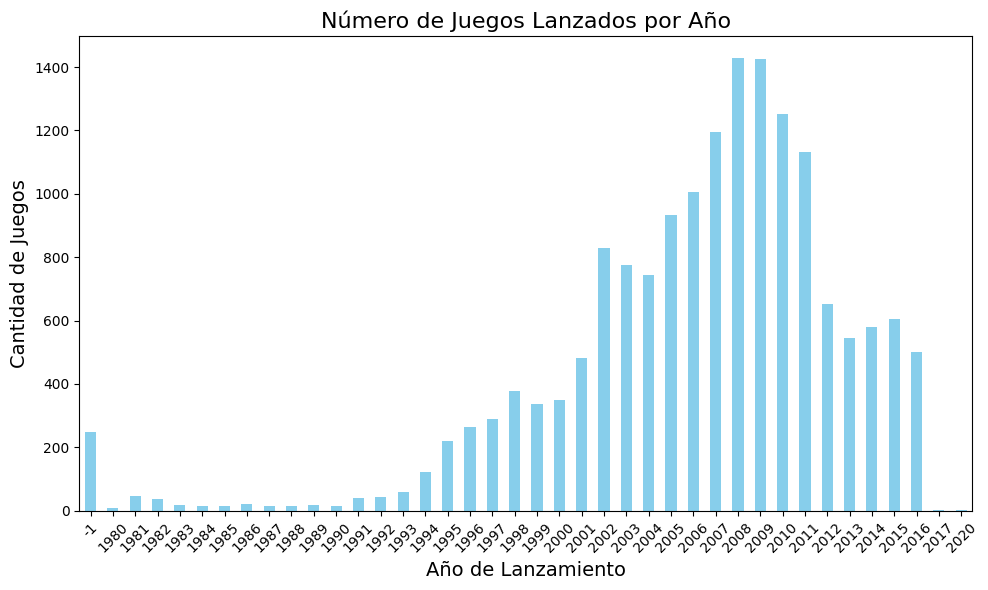

In [20]:
juegos_por_año = VD.groupby('Year_of_Release')['Name'].count()

plt.figure(figsize=(10,6))  
juegos_por_año.plot(kind='bar', color='skyblue')
plt.title('Número de Juegos Lanzados por Año', fontsize=16)
plt.xlabel('Año de Lanzamiento', fontsize=14)
plt.ylabel('Cantidad de Juegos', fontsize=14)

plt.xticks(rotation=45) 
plt.tight_layout()  
plt.show()

In [35]:
from sklearn.model_selection import train_test_split

X = VD[['Year_of_Release']]  # Variables independientes
y = VD['Name']  # Variable dependiente 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X_train = X_train.dropna()
y_train = y_train[X_train.index] 
X_train = X_train.fillna(X_train.mean())  # Para columnas numéricas
y_train = y_train.fillna(y_train.mode()[0]) 

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

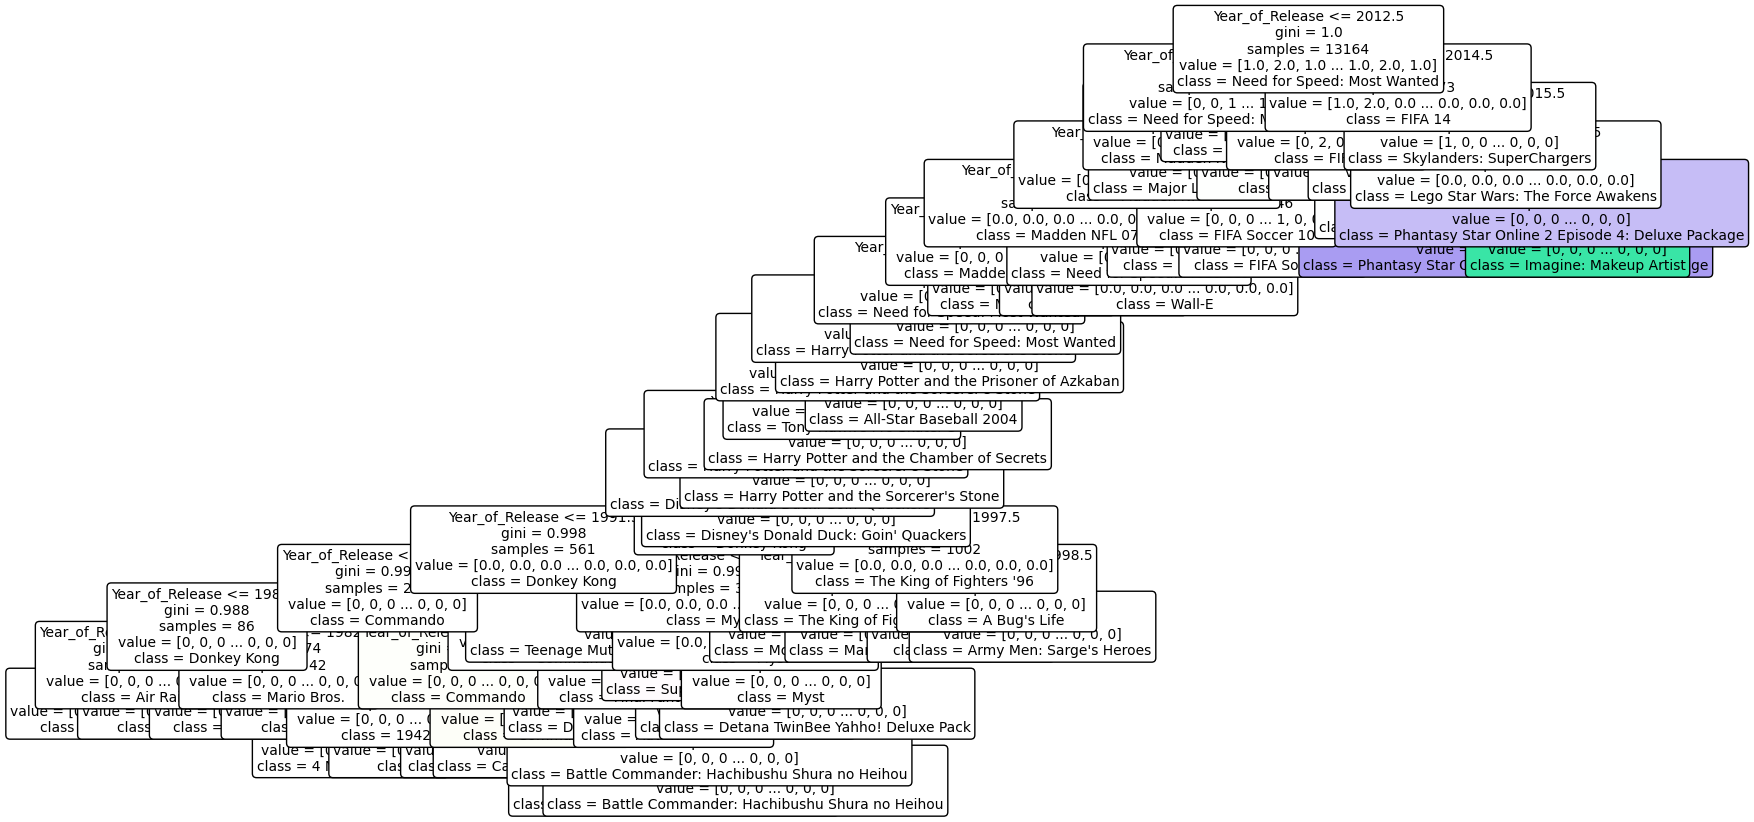

In [73]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


plt.figure(figsize=(20,10))  
plot_tree(model, 
          feature_names=X_train.columns,  
          class_names=model.classes_,      
          filled=True,                
          rounded=True,     
          fontsize=10)                     

plt.show()

PODADO DEL ARBOL PARA MEJOR LECTURA

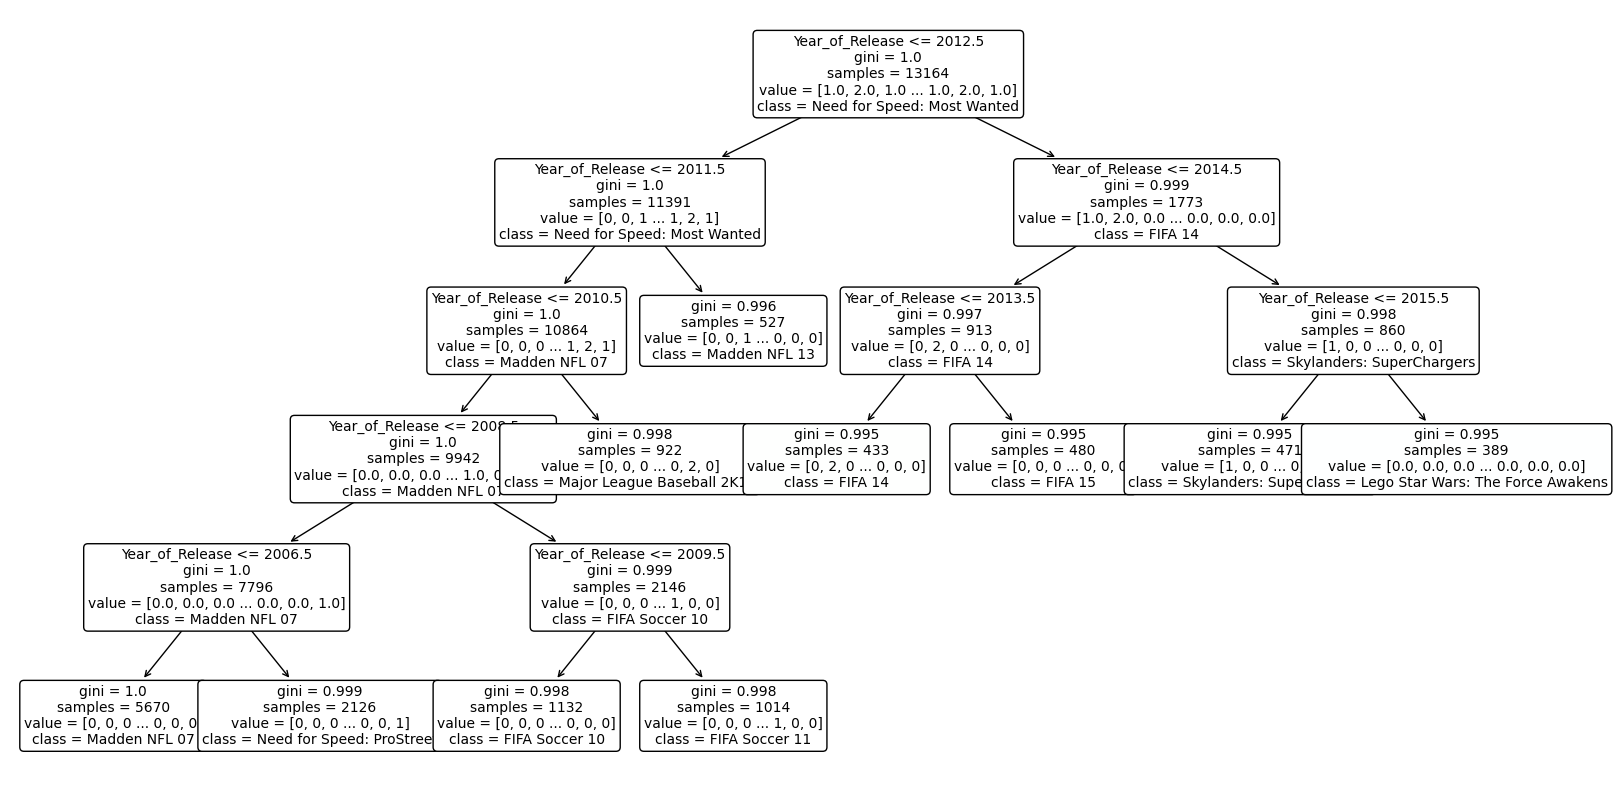

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Limpieza de datos
X_train = X_train.dropna()
y_train = y_train[X_train.index]
X_train = X_train.fillna(X_train.mean())  
y_train = y_train.fillna(y_train.mode()[0])


model = DecisionTreeClassifier(max_depth=5, min_samples_leaf=4, max_leaf_nodes=10)
model.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(model, 
          feature_names=X_train.columns, 
          class_names=model.classes_, 
          filled=True, 
          rounded=True, 
          fontsize=10)
plt.show()
